In [43]:
import numpy as np
import pandas as pd
import re

In [44]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [45]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [46]:
df.duplicated().sum()

121

In [47]:
df.head(1)
# My focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,la vida by tata housing,sector 113,1.55,11654.0,1330.0,Super Built up area 1330(123.56 sq.m.)Built Up area: 1276 sq.ft. (118.54 sq.m.)Carpet area: 1180 sq.ft. (109.63 sq.m.),2.0,2.0,3,not available,2.0,North-East,0 to 1 Year Old,"['Dwarka Sector 21', 'Pacific D21 Mall', 'Bajghera Road', 'Dwarka Expy', 'Euro International School, Sector- 109.', 'The NorthCap University', ""Rion's Hospital"", 'Indira Gandhi Intl Airport', 'Bijwasan Railway Station']","['2 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


## <b> 1. areaWithType

In [48]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
2490,4.95,2403.0,Plot area 267(223.25 sq.m.)
3289,1.18,1450.0,Super Built up area 1450(134.71 sq.m.)Built Up area: 1400 sq.ft. (130.06 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.)
3183,3.25,2302.0,Carpet area: 2302 (213.86 sq.m.)
535,0.60,1304.0,Super Built up area 1304(121.15 sq.m.)
1038,0.90,1986.0,Super Built up area 1975(183.48 sq.m.)Built Up area: 1575 sq.ft. (146.32 sq.m.)Carpet area: 1435 sq.ft. (133.32 sq.m.)


### <b> We will create 3 different column from the areaWithType column.

In [49]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [50]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [51]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [52]:
# Ensure 'areaWithType' is a string
df['areaWithType'] = df['areaWithType'].astype(str)

# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], str(x['super_built_up_area'])), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], str(x['built_up_area'])), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], str(x['carpet_area'])), axis=1)

In [53]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
639,0.43,flat,770.0,Carpet area: 770 (71.54 sq.m.),nan,nan,770.0
3743,0.82,flat,830.0,Super Built up area 1400(130.06 sq.m.)Carpet area: 830 sq.ft. (77.11 sq.m.),1400.0,nan,830.0
3135,0.41,flat,662.0,Built Up area: 670 (62.25 sq.m.)Carpet area: 569.25 sq.ft. (52.89 sq.m.),nan,670.0,569.25
2111,1.17,flat,1671.0,Super Built up area 1671(155.24 sq.m.)Built Up area: 1660 sq.ft. (154.22 sq.m.)Carpet area: 1650 sq.ft. (153.29 sq.m.),1671.0,1660.0,1650.0
423,0.35,flat,1000.0,Super Built up area 1000(92.9 sq.m.),1000.0,nan,nan


In [55]:
df.duplicated().sum()

121

In [59]:
# Changing the data types of super_built_up_area, built_up_area and carpet_area to 'float' from 'object'
df['super_built_up_area'] = df['super_built_up_area'].astype(float)
df['built_up_area'] = df['built_up_area'].astype(float)
df['carpet_area'] = df['carpet_area'].astype(float)

In [66]:
# Rows where super_built_up_area, built_up_area, and carpet_area are all not null
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price', 'property_type', 'area', 'areaWithType', 'super_built_up_area', 'built_up_area', 'carpet_area']].head(3)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,1.55,flat,1330.0,Super Built up area 1330(123.56 sq.m.)Built Up area: 1276 sq.ft. (118.54 sq.m.)Carpet area: 1180 sq.ft. (109.63 sq.m.),1330.0,1276.0,1180.0
12,2.10,flat,1508.0,Super Built up area 1508(140.1 sq.m.)Built Up area: 1500 sq.ft. (139.35 sq.m.)Carpet area: 1200 sq.ft. (111.48 sq.m.),1508.0,1500.0,1200.0
14,5.25,flat,2575.0,Super Built up area 2575(239.23 sq.m.)Built Up area: 2570 sq.ft. (238.76 sq.m.)Carpet area: 2560 sq.ft. (237.83 sq.m.),2575.0,2570.0,2560.0


In [68]:
# number of Rows where super_built_up_area, built_up_area, and carpet_area are all not null
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price', 'property_type', 'area', 'areaWithType', 'super_built_up_area', 'built_up_area', 'carpet_area']].shape

(534, 7)

In [70]:
# Rows where areaWithType contains 'Plot'
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(3)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
7,0.4,house,432.0,Plot area 432(40.13 sq.m.),NaN,NaN,NaN
20,4.5,house,1845.0,Plot area 204(170.57 sq.m.)Built Up area: 206 sq.yards (172.24 sq.m.)Carpet area: 205 sq.yards (171.41 sq.m.),NaN,206.0,205.0
22,6.0,house,190.0,Plot area 190(17.65 sq.m.)Carpet area: 1600 sq.ft. (148.64 sq.m.),NaN,NaN,1600.0


In [71]:
# Number of Rows where areaWithType contains 'Plot'
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(682, 7)

In [72]:
df.isnull().sum()

property_type             1
society                   3
sector                    0
price                    19
price_per_sqft           19
area                     19
areaWithType              0
bedRoom                   1
bathroom                  1
balcony                   1
additionalRoom            1
floorNum                 20
facing                 1106
agePossession             2
nearbyLocations         178
furnishDetails          982
features                636
super_built_up_area    1889
built_up_area          2617
carpet_area            1860
dtype: int64

In [73]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [74]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
7,0.40,house,432.0,Plot area 432(40.13 sq.m.),NaN,NaN,NaN
29,10.55,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
33,3.51,house,2844.0,Plot area 316(264.22 sq.m.),NaN,NaN,NaN
34,7.50,house,4518.0,Plot area 502(419.74 sq.m.),NaN,NaN,NaN
38,3.00,house,1557.0,Plot area 173(144.65 sq.m.),NaN,NaN,NaN


In [75]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [76]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [77]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [79]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
7,0.40,house,432.0,Plot area 432(40.13 sq.m.),NaN,432.0,NaN
29,10.55,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.0,NaN
33,3.51,house,2844.0,Plot area 316(264.22 sq.m.),NaN,316.0,NaN
34,7.50,house,4518.0,Plot area 502(419.74 sq.m.),NaN,502.0,NaN
38,3.00,house,1557.0,Plot area 173(144.65 sq.m.),NaN,173.0,NaN


In [80]:
# Changing the unit of 'built_up_area' to sqft
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [81]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [82]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
7,0.40,house,432.0,Plot area 432(40.13 sq.m.),NaN,432.0,NaN
29,10.55,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.0,NaN
33,3.51,house,2844.0,Plot area 316(264.22 sq.m.),NaN,2844.0,NaN
34,7.50,house,4518.0,Plot area 502(419.74 sq.m.),NaN,4518.0,NaN
38,3.00,house,1557.0,Plot area 173(144.65 sq.m.),NaN,1557.0,NaN


In [83]:
# update the original dataframe
df.update(all_nan_df)

In [84]:
df.isnull().sum()

property_type             1
society                   3
sector                    0
price                    19
price_per_sqft           19
area                     19
areaWithType              0
bedRoom                   1
bathroom                  1
balcony                   1
additionalRoom            1
floorNum                 20
facing                 1106
agePossession             2
nearbyLocations         178
furnishDetails          982
features                636
super_built_up_area    1889
built_up_area          2071
carpet_area            1860
dtype: int64

In [85]:
df.head(3)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,la vida by tata housing,sector 113,1.55,11654.0,1330.0,Super Built up area 1330(123.56 sq.m.)Built Up area: 1276 sq.ft. (118.54 sq.m.)Carpet area: 1180 sq.ft. (109.63 sq.m.),2.0,2.0,3,not available,2.0,North-East,0 to 1 Year Old,"['Dwarka Sector 21', 'Pacific D21 Mall', 'Bajghera Road', 'Dwarka Expy', 'Euro International School, Sector- 109.', 'The NorthCap University', ""Rion's Hospital"", 'Indira Gandhi Intl Airport', 'Bijwasan Railway Station']","['2 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1330.0,1276.0,1180.0
1,flat,vatika city,sector 49,3.60,11920.0,3020.0,Carpet area: 3020 (280.57 sq.m.),4.0,5.0,3,"pooja room,servant room",7.0,NaN,5 to 10 Year Old,"['BOB ATM', 'PNB ATM', 'HDFC bank ATM', 'YES bank ATM', 'Citibank ATM', 'Gurugram Hospital', 'Ektaa Hospital', 'Park Hospital', 'Polaris Hospital', 'Govind Hospital', ""Guls' Kitchen"", 'The Nook', 'Open Tap', 'Frescos', 'Subway']","['1 Water Purifier', '7 Fan', '1 Exhaust Fan', '1 Dining Table', '5 Geyser', '1 Stove', '99 Light', '7 AC', '1 Chimney', '6 Curtains', '1 Modular Kitchen', '7 Wardrobe', '1 Sofa', '1 Microwave', 'No Bed', 'No Fridge', 'No TV', 'No Washing Machine']","['Intercom Facility', 'Lift(s)', 'Park']",NaN,NaN,3020.0
2,flat,mm the marina,sector 68,1.00,12500.0,800.0,Carpet area: 800 (74.32 sq.m.),2.0,2.0,3,not available,21.0,NaN,1 to 5 Year Old,"['Airia Mall', 'Southern Peripheral Road', 'Sohna Road', 'Alpine Convent\xa0School', 'MKD Hospital', 'Indira Gandhi International Airport', 'Bhondsi Nature Park', 'Lemon Tree Hotel, Sohna Road', 'De Adventure Park', 'PVR Drive in Theatre']",NaN,"['Power Back-up', 'Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",NaN,NaN,800.0


## 2.additionalRoom

In [86]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,st

In [88]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).fillna(False).astype(int)

C:\Users\ranja\AppData\Local\Temp\ipykernel_10892\185033086.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df['additionalRoom'].str.contains(col).fillna(False).astype(int)
C:\Users\ranja\AppData\Local\Temp\ipykernel_10892\185033086.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df['additionalRoom'].str.contains(col).fillna(False).astype(int)
C:\Users\ranja\AppData\Local\Temp\ipykernel_10892\185033086.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future vers

In [89]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
1516,"study room,servant room",1,1,0,0,0
1576,not available,0,0,0,0,0
2746,not available,0,0,0,0,0
170,"servant room,store room",0,1,1,0,0
2416,store room,0,0,1,0,0


In [91]:
df.head(3)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,la vida by tata housing,sector 113,1.55,11654.0,1330.0,Super Built up area 1330(123.56 sq.m.)Built Up area: 1276 sq.ft. (118.54 sq.m.)Carpet area: 1180 sq.ft. (109.63 sq.m.),2.0,2.0,3,not available,2.0,North-East,0 to 1 Year Old,"['Dwarka Sector 21', 'Pacific D21 Mall', 'Bajghera Road', 'Dwarka Expy', 'Euro International School, Sector- 109.', 'The NorthCap University', ""Rion's Hospital"", 'Indira Gandhi Intl Airport', 'Bijwasan Railway Station']","['2 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1330.0,1276.0,1180.0,0,0,0,0,0
1,flat,vatika city,sector 49,3.60,11920.0,3020.0,Carpet area: 3020 (280.57 sq.m.),4.0,5.0,3,"pooja room,servant room",7.0,NaN,5 to 10 Year Old,"['BOB ATM', 'PNB ATM', 'HDFC bank ATM', 'YES bank ATM', 'Citibank ATM', 'Gurugram Hospital', 'Ektaa Hospital', 'Park Hospital', 'Polaris Hospital', 'Govind Hospital', ""Guls' Kitchen"", 'The Nook', 'Open Tap', 'Frescos', 'Subway']","['1 Water Purifier', '7 Fan', '1 Exhaust Fan', '1 Dining Table', '5 Geyser', '1 Stove', '99 Light', '7 AC', '1 Chimney', '6 Curtains', '1 Modular Kitchen', '7 Wardrobe', '1 Sofa', '1 Microwave', 'No Bed', 'No Fridge', 'No TV', 'No Washing Machine']","['Intercom Facility', 'Lift(s)', 'Park']",NaN,NaN,3020.0,0,1,0,1,0
2,flat,mm the marina,sector 68,1.00,12500.0,800.0,Carpet area: 800 (74.32 sq.m.),2.0,2.0,3,not available,21.0,NaN,1 to 5 Year Old,"['Airia Mall', 'Southern Peripheral Road', 'Sohna Road', 'Alpine Convent\xa0School', 'MKD Hospital', 'Indira Gandhi International Airport', 'Bhondsi Nature Park', 'Lemon Tree Hotel, Sohna Road', 'De Adventure Park', 'PVR Drive in Theatre']",NaN,"['Power Back-up', 'Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",NaN,NaN,800.0,0,0,0,0,0


## 3.agePossession

In [92]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Aug 2023                 7
Jun 2024                 7
Dec 2025                 7
Nov 2023                 5
Aug 2024                 4
By 2025                  4
Jul 2024                 4
Sep 2023                 4
Oct 2023                 4
Jan 2025                 3
Feb 2024                 3
Nov 2024                 3
May 2024                 3
Jan 2026                 2
Dec 2026                 2
Sep 2025                 2
Aug 2025                 2
By 2027                  2
Jul 2025                 2
Apr 2026                 2
Oct 2025                 2
Jul 2027      

In [93]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [94]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [95]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              334
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [96]:
df.head(3)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,la vida by tata housing,sector 113,1.55,11654.0,1330.0,Super Built up area 1330(123.56 sq.m.)Built Up area: 1276 sq.ft. (118.54 sq.m.)Carpet area: 1180 sq.ft. (109.63 sq.m.),2.0,2.0,3,not available,2.0,North-East,New Property,"['Dwarka Sector 21', 'Pacific D21 Mall', 'Bajghera Road', 'Dwarka Expy', 'Euro International School, Sector- 109.', 'The NorthCap University', ""Rion's Hospital"", 'Indira Gandhi Intl Airport', 'Bijwasan Railway Station']","['2 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1330.0,1276.0,1180.0,0,0,0,0,0
1,flat,vatika city,sector 49,3.60,11920.0,3020.0,Carpet area: 3020 (280.57 sq.m.),4.0,5.0,3,"pooja room,servant room",7.0,NaN,Moderately Old,"['BOB ATM', 'PNB ATM', 'HDFC bank ATM', 'YES bank ATM', 'Citibank ATM', 'Gurugram Hospital', 'Ektaa Hospital', 'Park Hospital', 'Polaris Hospital', 'Govind Hospital', ""Guls' Kitchen"", 'The Nook', 'Open Tap', 'Frescos', 'Subway']","['1 Water Purifier', '7 Fan', '1 Exhaust Fan', '1 Dining Table', '5 Geyser', '1 Stove', '99 Light', '7 AC', '1 Chimney', '6 Curtains', '1 Modular Kitchen', '7 Wardrobe', '1 Sofa', '1 Microwave', 'No Bed', 'No Fridge', 'No TV', 'No Washing Machine']","['Intercom Facility', 'Lift(s)', 'Park']",NaN,NaN,3020.0,0,1,0,1,0
2,flat,mm the marina,sector 68,1.00,12500.0,800.0,Carpet area: 800 (74.32 sq.m.),2.0,2.0,3,not available,21.0,NaN,Relatively New,"['Airia Mall', 'Southern Peripheral Road', 'Sohna Road', 'Alpine Convent\xa0School', 'MKD Hospital', 'Indira Gandhi International Airport', 'Bhondsi Nature Park', 'Lemon Tree Hotel, Sohna Road', 'De Adventure Park', 'PVR Drive in Theatre']",NaN,"['Power Back-up', 'Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",NaN,NaN,800.0,0,0,0,0,0


## 4.furnishDetails

In [605]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
1623,NaN,"['Security / Fire Alarm', 'Power Back-up', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Visitor Parking', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']"
2713,"['3 Fan', '1 Exhaust Fan', '3 Geyser', '7 Light', '1 Chimney', '2 Wardrobe', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN
130,"['7 Wardrobe', '17 Light', '5 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
1419,NaN,"['Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Park', 'Visitor Parking', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors']"
2213,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN


In [97]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ranja\AppData\Local\Temp\ipykernel_10892\2118040236.py:13: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


In [98]:
furnishings_df.shape

(3804, 19)

In [99]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\ranja\AppData\Local\Temp\ipykernel_10892\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [100]:
furnishings_df.sample(5)

,Bed,Sofa,Dining Table,Water Purifier,AC,Geyser,Fan,Fridge,Stove,Wardrobe,Microwave,Curtains,Light,TV,Modular Kitchen,Washing Machine,Exhaust Fan,Chimney
1197,0,0,0,0,0,0,3,0,0,0,0,0,3,0,1,0,1,0
1042,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2872,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3640,0,0,0,1,4,3,4,0,0,3,0,1,4,0,1,0,1,1
3780,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0


In [101]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [102]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [103]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

C:\Users\ranja\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ranja\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Program Files\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Program Files\Python312\Lib\subprocess.py", line 1538, in _execute_ch

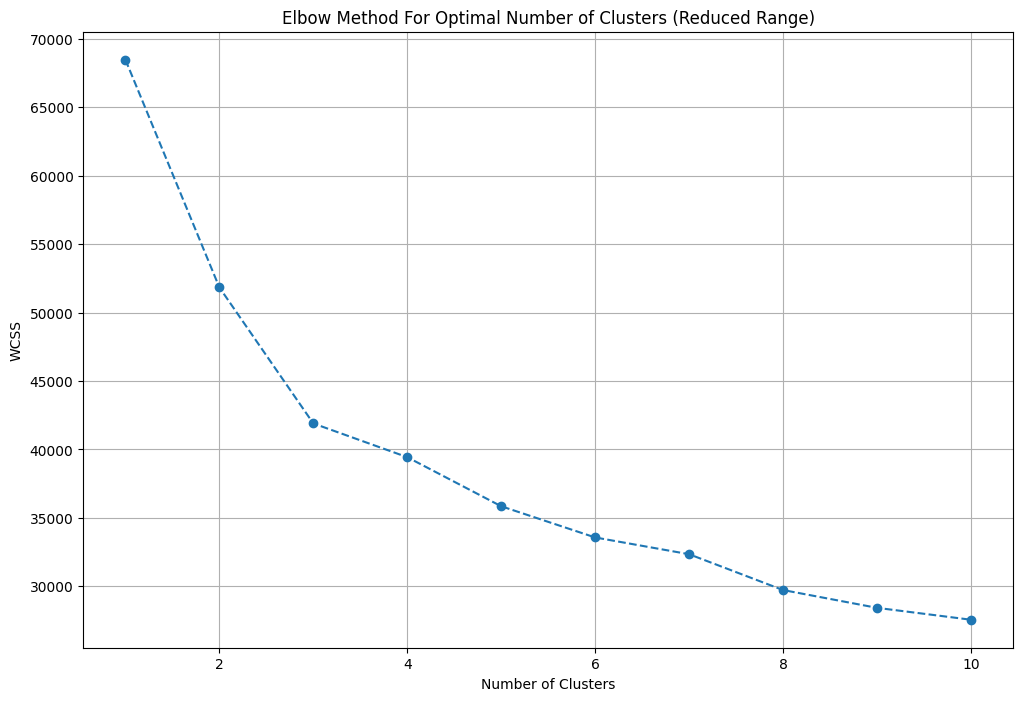

In [104]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [105]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [106]:
df = df.iloc[:,:-18]

In [107]:
df['furnishing_type'] = cluster_assignments

In [113]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
3213,NaN,0
129,"['1 Water Purifier', '1 Fridge', '1 Washing Machine', '1 Stove', '1 Microwave', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Sofa', 'No TV', 'No Wardrobe']",2
916,NaN,0
323,"['3 Wardrobe', '1 Water Purifier', '4 Fan', '1 Exhaust Fan', '3 Geyser', '4 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']",1
2757,NaN,0


## 5.features

In [114]:
df[['society','features']].sample(5)

,society,features
2881,paras dews,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
1893,independent,"['Feng Shui / Vaastu Compliant', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']"
3112,mm woodshire,"['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
1362,independent,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']"
2343,sare crescent parc,NaN


In [117]:
df['features'].isnull().sum()

636

In [119]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [122]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [123]:
temp_df = df[df['features'].isnull()]

In [124]:
temp_df.shape

(636, 26)

In [125]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [126]:
x.head(2)

0    NaN
1    NaN
Name: TopFacilities, dtype: object

In [128]:
df.loc[temp_df.index,'features'] = x.values

In [129]:
df['features'].isnull().sum()

500

In [130]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [131]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [132]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Airy Rooms,Amphitheatre,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Billiards,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Toddler Pool,Valet Parking,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
1183,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2276,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
1365,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
172,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
608,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0


In [133]:
features_binary_df.shape

(3804, 122)

In [134]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

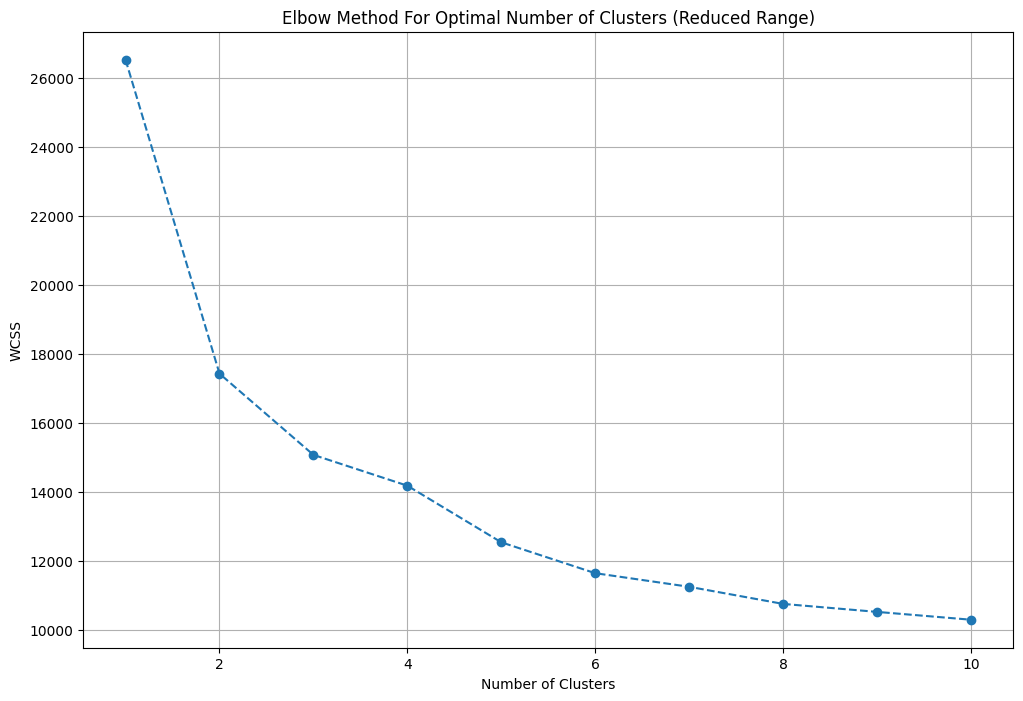

In [135]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [141]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
# luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [144]:
# Check if columns exist in the DataFrame index
missing_columns = [col for col in ['Bowling Alley', 'Party Lawn', 'Theatre'] if col not in features_binary_df.columns]

# Remove missing columns from the weights dictionary
for col in missing_columns:
    weights.pop(col, None)

# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [145]:
df['luxury_score'] = luxury_score

In [146]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,la vida by tata housing,sector 113,1.55,11654.0,1330.0,Super Built up area 1330(123.56 sq.m.)Built Up area: 1276 sq.ft. (118.54 sq.m.)Carpet area: 1180 sq.ft. (109.63 sq.m.),2.0,2.0,3,not available,2.0,North-East,New Property,"['Dwarka Sector 21', 'Pacific D21 Mall', 'Bajghera Road', 'Dwarka Expy', 'Euro International School, Sector- 109.', 'The NorthCap University', ""Rion's Hospital"", 'Indira Gandhi Intl Airport', 'Bijwasan Railway Station']","['2 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1330.0,1276.0,1180.0,0,0,0,0,0,0,"[Centrally Air Conditioned, Water purifier, Security / Fire Alarm, Feng Shui / Vaastu Compliant, Private Garden / Terrace, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Bank Attached Property, Piped-gas, Internet/wi-fi connectivity, Recently Renovated, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Waste Disposal, Rain Water Harvesting, Water softening plant, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",174
1,flat,vatika city,sector 49,3.60,11920.0,3020.0,Carpet area: 3020 (280.57 sq.m.),4.0,5.0,3,"pooja room,servant room",7.0,NaN,Moderately Old,"['BOB ATM', 'PNB ATM', 'HDFC bank ATM', 'YES bank ATM', 'Citibank ATM', 'Gurugram Hospital', 'Ektaa Hospital', 'Park Hospital', 'Polaris Hospital', 'Govind Hospital', ""Guls' Kitchen"", 'The Nook', 'Open Tap', 'Frescos', 'Subway']","['1 Water Purifier', '7 Fan', '1 Exhaust Fan', '1 Dining Table', '5 Geyser', '1 Stove', '99 Light', '7 AC', '1 Chimney', '6 Curtains', '1 Modular Kitchen', '7 Wardrobe', '1 Sofa', '1 Microwave', 'No Bed', 'No Fridge', 'No TV', 'No Washing Machine']","['Intercom Facility', 'Lift(s)', 'Park']",NaN,NaN,3020.0,0,1,0,1,0,2,"[Intercom Facility, Lift(s), Park]",15
2,flat,mm the marina,sector 68,1.00,12500.0,800.0,Carpet area: 800 (74.32 sq.m.),2.0,2.0,3,not available,21.0,NaN,Relatively New,"['Airia Mall', 'Southern Peripheral Road', 'Sohna Road', 'Alpine Convent\xa0School', 'MKD Hospital', 'Indira Gandhi International Airport', 'Bhondsi Nature Park', 'Lemon Tree Hotel, Sohna Road', 'De Adventure Park', 'PVR Drive in Theatre']",NaN,"['Power Back-up', 'Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",NaN,NaN,800.0,0,0,0,0,0,0,"[Power Back-up, Lift(s), Swimming Pool, Park, Fitness Centre / GYM, Club house / Community Center, Rain Water Harvesting]",31
3,flat,godrej nature plus,sector 33,1.40,15124.0,926.0,Super Built up area 145Carpet area: 86 sq.m.,3.0,2.0,3+,not available,20.0,NaN,New Property,"['Signature Global Infinity Mall Sohna', 'Badsh

In [147]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [149]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
430,flat,dlf the grove,sector 54,5.70,41245.0,1382.0,Built Up area: 1382 (128.39 sq.m.),3.0,3.0,3,1.0,East,Undefined,NaN,1382.0,NaN,0,0,0,0,0,0,46
3115,house,vipul tatvam villa,sector 48,6.40,24691.0,2592.0,Plot area 288(240.8 sq.m.)Built Up area: 240 sq.yards (200.67 sq.m.)Carpet area: 200 sq.yards (167.23 sq.m.),3.0,4.0,3,2.0,North,Relatively New,NaN,240.0,200.0,1,1,1,0,0,1,148
261,flat,avl gurgaon,sector 36a,0.36,8990.0,400.0,Super Built up area 406(37.72 sq.m.)Carpet area: 402 sq.ft. (37.35 sq.m.),1.0,1.0,1,7.0,West,Relatively New,406.0,NaN,402.0,0,0,0,0,0,0,95
1223,flat,shapoorji pallonji joyville,sector 102,1.10,12022.0,915.0,Built Up area: 915 (85.01 sq.m.)Carpet area: 700 sq.ft. (65.03 sq.m.),2.0,2.0,1,7.0,NaN,Undefined,NaN,915.0,700.0,0,0,0,0,0,0,0
1593,flat,orchid petals,sector 49,4.21,11835.0,3557.0,Super Built up area 3557(330.46 sq.m.),5.0,6.0,3+,14.0,South-East,Relatively New,3557.0,NaN,NaN,0,1,0,1,0,0,35


In [150]:
df.shape

(3804, 23)

In [151]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)